In [10]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [1]:
import sys
print(sys.executable)

/Users/acw/llm-env/.venv/bin/python3


torch.randint(len(training_data), size=(1,)) 生成一个随机索引
len(training_data) 是训练数据集的总样本数（60000）
size=(1,) 表示生成一个随机数
.item() 将tensor转换为Python标量
training_data[sample_idx] 获取指定索引的图像和标签
figure.add_subplot(rows, cols, i) 在指定位置添加子图
plt.title(labels_map[label]) 设置图像标题为对应的类别名称
plt.axis("off") 关闭坐标轴显示
plt.imshow(img.squeeze(), cmap="gray") 显示图像
img.squeeze() 去除多余的维度（将(1, 28, 28)变为(28, 28)）
cmap="gray" 使用灰度色彩映射

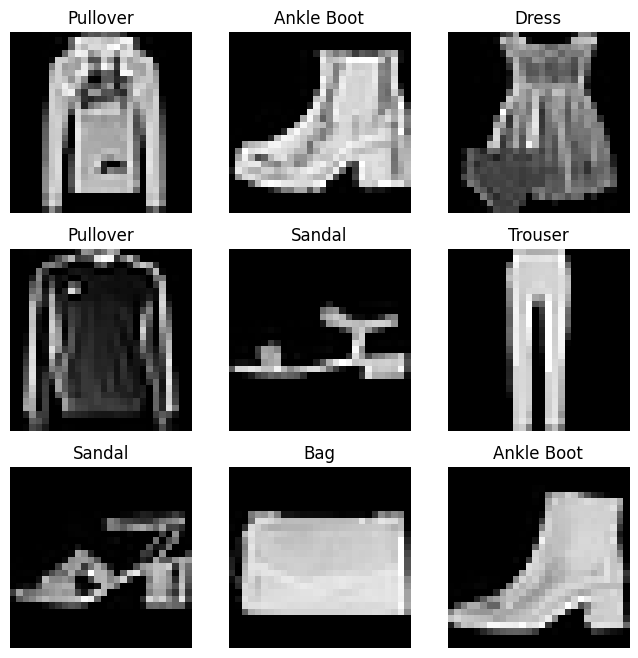

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # size=(1,) 表示生成一个随机数、.item() 将tensor转换为Python标量
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # 获取指定索引的图像和标签
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [12]:
import os
import pandas as pd
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    # 读取CSV文件
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # 这里加载CSV数据
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
         # 获取文件名和标签
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # 文件名
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1] # 标签
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


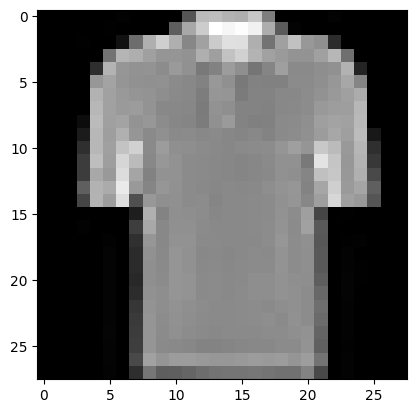

Label: 0


In [15]:
train_feature,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_feature.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_feature[0].squeeze() #压缩维度，移除大小为1的维度
label=train_labels[0]# 获取第一个样本对应的标签值
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")